In [244]:
# AUTHOR Christian Dansereau 2016

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.io
import os
import nibabel as nib
from nibabel.affines import apply_affine
from nilearn import plotting
import numpy.linalg as npl

# Load data

In [245]:
#seed_data = pd.read_csv('20160128_AD_Decrease_Meta_Christian.csv')

#seed_data = pd.read_csv('20160129_AD_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160129_AD_Increase_Meta_Final.csv')

#seed_data = pd.read_csv('20160129_MCI_Decrease_Meta_Final.csv')
seed_data = pd.read_csv('20160129_MCI_Increase_Meta_Final.csv')


template_036= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale036.nii.gz')
template_020= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale020.nii.gz')
template_012= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale012.nii.gz')
template_007= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')

template = template_007

In [246]:
seed_data

,PMID,Author,Year,subjects,x,y,z,Contrast,Direction
0,19765560,Bai,2009,56,-9.00,57.00,-12.00,MCI,Increase
1,19765560,Bai,2009,56,3.00,57.00,-15.00,MCI,Increase
2,19765560,Bai,2009,56,-6.00,36.00,33.00,MCI,Increase
3,19765560,Bai,2009,56,-39.00,33.00,-18.00,MCI,Increase
4,19765560,Bai,2009,56,-39.00,-18.00,-30.00,MCI,Increase
5,20930266,Bai,2011,44,-15.00,-45.00,-48.00,MCI,Increase
6,20930266,Bai,2011,44,-15.00,-45.00,-45.00,MCI,Increase
7,20930266,Bai,2011,44,3.00,-57.00,12.00,MCI,Increase
8,20930266,Bai,2011,44,-3.00,-63.00,9.00,MCI,Increase
9,21982164,Jin,2012,16,8.00,46.00,36.00,MCI,Increase


## Get the number of coordinates reported for each network

In [247]:
# Convert from world MNI space to the EPI voxel space
def get_world2vox(template, mni_coord):
    return np.round(apply_affine(npl.inv(template.get_affine()),mni_coord)+[1])
    
network_votes = np.zeros((np.max(template.get_data().flatten()),1))[:,0]
network_votes

# get the voxel coordinates of the MNI seeds
vox_corrd = get_world2vox(template,seed_data[['x','y','z']].values)
votes = []
for i in range(vox_corrd.shape[0]):
    votes.append(template.get_data()[vox_corrd[i,0],vox_corrd[i,1],vox_corrd[i,2]])
votes = np.array(votes)    

for i in range(1,len(network_votes)+1):
    network_votes[i-1] = np.sum(votes==i)

print network_votes 
#vox_corrd[np.array(votes)==5,:]

[ 0.  0.  1.  1.  2.  0.  0.  5.  0.  1.  0.  3.  0.  2.  0.  0.  0.  2.
  0.  0.  0.  1.  0.  0.  2.  0.  0.  0.  1.  2.  2.  3.  1.  1.  0.  2.]


## Generate random coordinates
#### The assigned coodinates are generated for each network witha proability equivalent to there volume size compare to the total volume of the brain

In [248]:

# Total volume of the brain
total_volume = np.sum(template.get_data()>0)

# compute the proba of each network
proba_networks=[]
for i in range(1,len(network_votes)+1):
    proba_networks.append(np.sum(template.get_data()==i)/(total_volume*1.))
proba_networks = np.array(proba_networks)
print np.sum(proba_networks)
print proba_networks

# generate random values 
def gen_rnd_hits(proba,n_seeds):
    results_h0 =  np.random.choice(range(0,len(proba)),size=(n_seeds,1000),p=proba)
    ditributions = []
    for i in range(len(proba)):
        one_way_pdf = np.sort(np.sum(results_h0 == i,axis=0))
        ditributions.append(one_way_pdf[::-1])   
    return ditributions
    
dist_data = gen_rnd_hits(proba_networks,np.sum(network_votes[1:]))


1.0
[ 0.01292611  0.01787506  0.01579858  0.01342793  0.01671569  0.01412009
  0.01960547  0.02496972  0.01775394  0.02441599  0.01770202  0.02941685
  0.02853435  0.01915556  0.02929573  0.03292957  0.03163177  0.02310088
  0.02479668  0.03317183  0.04075099  0.02912269  0.02611178  0.02978024
  0.04455788  0.02891504  0.01429313  0.02278941  0.02957259  0.03215089
  0.0433293   0.03299879  0.03421007  0.03739401  0.04514622  0.06153314]


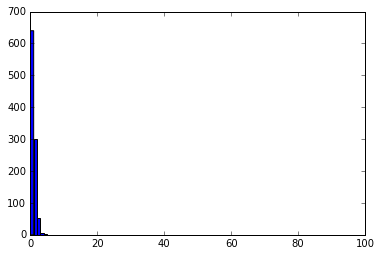

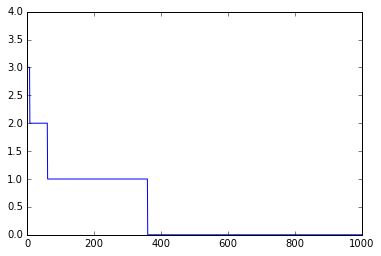

In [249]:
plt.figure()
plt.hist(dist_data[0],bins=np.arange(0,100,1))
plt.figure()
plt.plot(dist_data[0].T)

## Generate the p-values for each network

[ 0.  1.  1.  2.  0.  0.  5.  0.  1.  0.  3.  0.  2.  0.  0.  0.  2.  0.
  0.  0.  1.  0.  0.  2.  0.  0.  0.  1.  2.  2.  3.  1.  1.  0.  2.]
[1.0, 1.0, 0.41558441558441561, 0.35064935064935066, 0.080919080919080913, 1.0, 1.0, 0.000999000999000999, 1.0, 0.53946053946053951, 1.0, 0.060939060939060936, 1.0, 0.12187812187812187, 1.0, 1.0, 1.0, 0.16783216783216784, 1.0, 1.0, 1.0, 0.63436563436563431, 1.0, 1.0, 0.39960039960039961, 1.0, 1.0, 1.0, 0.58741258741258739, 0.27272727272727271, 0.41458541458541459, 0.093906093906093904, 0.66233766233766234, 0.70829170829170829, 1.0, 0.60339660339660339]


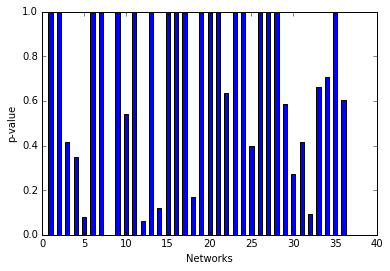

In [250]:
def getpval(nhit,dist_data):
    distribution_val =  np.histogram(dist_data,bins=np.arange(0,100,1))
    return (np.sum(distribution_val[0][nhit:-1])+1)/(dist_data.shape[0]+1.)

print network_votes[1:]

pval_results=[]
for i in range(0,len(dist_data)):
    pval_results.append(getpval(network_votes[i],dist_data[i]))
    
print pval_results
plt.figure()
plt.bar(np.arange(1,len(pval_results)+1),pval_results,width=0.5,align='center')
plt.xlabel('Networks')
plt.ylabel('p-value')

### Map the p-values to the template

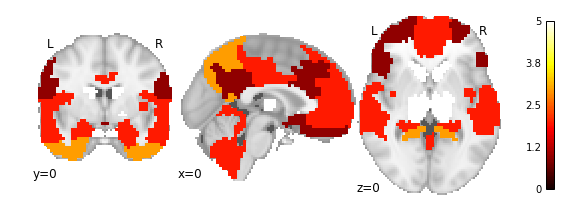

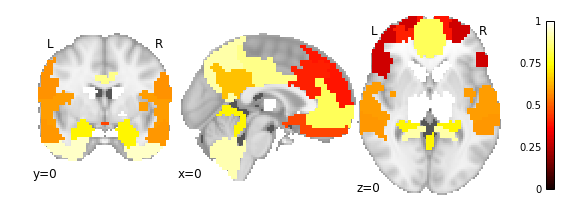

In [251]:
from proteus.matrix import tseries as ts
hitfreq_vol = ts.vec2map(network_votes,template)
pval_vol = ts.vec2map(1-np.array(pval_results),template)
plt.figure()
plotting.plot_stat_map(hitfreq_vol,cut_coords=(0,0,0),draw_cross=False)
plt.figure()
plotting.plot_stat_map(pval_vol,cut_coords=(0,0,0),draw_cross=False)


#### FDR correction of the p-values

In [252]:
# correct for FRD
from statsmodels.sandbox.stats.multicomp import fdrcorrection0

fdr_test,fdr_pval=fdrcorrection0(pval_results,alpha=0.05)

In [253]:
print network_votes
print fdr_test

[ 0.  0.  1.  1.  2.  0.  0.  5.  0.  1.  0.  3.  0.  2.  0.  0.  0.  2.
  0.  0.  0.  1.  0.  0.  2.  0.  0.  0.  1.  2.  2.  3.  1.  1.  0.  2.]
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [254]:
# save the results
path_output = '/home/cdansereau/git/Projects/metaad/maps_results/'
stats_results = {'Hits':network_votes ,'pvalues':pval_results,'fdr_test':fdr_test,'fdr_pval':fdr_pval}
scipy.io.savemat(path_output + 'MCI_increase_scale7_stats.mat',stats_results)
hitfreq_vol.to_filename(os.path.join(path_output,'MCI_increase_hitfreq_scale7_vol.nii.gz'))
#hitfreq_vol.to_filename(os.path.join('/home/cdansereau/git/Projects/metaad/maps_results/','AD_pval_vol.nii.gz'))